<a href="https://colab.research.google.com/github/Rambimo/PCVK_Ganjil_2023/blob/main/Week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

# Accessing My Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [38]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import glob

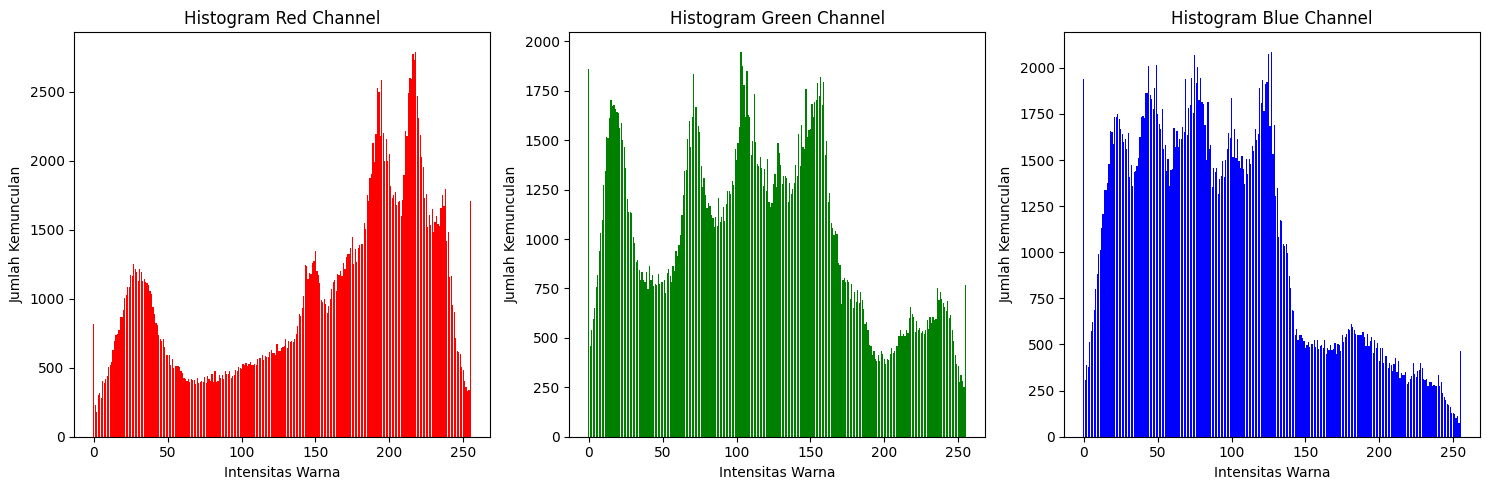

In [8]:
# Input image
image_path = "/content/drive/MyDrive/PCVK/lena.jpg"  # Ganti dengan lokasi gambar Anda
image = cv.imread(image_path)

# Pisahkan kanal warna (R, G, B)
blue_channel = image[:, :, 0]
green_channel = image[:, :, 1]
red_channel = image[:, :, 2]

# Menghitung histogram untuk setiap kanal warna
hist_b = cv.calcHist([blue_channel], [0], None, [256], [0, 256])
hist_g = cv.calcHist([green_channel], [0], None, [256], [0, 256])
hist_r = cv.calcHist([red_channel], [0], None, [256], [0, 256])

# Membuat tiga plot terpisah untuk histogram RGB dengan bar histogram
plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.bar(np.arange(256), hist_r.ravel(), color='red', label='Red Channel')
plt.xlabel('Intensitas Warna')
plt.ylabel('Jumlah Kemunculan')
plt.title('Histogram Red Channel')

plt.subplot(132)
plt.bar(np.arange(256), hist_g.ravel(), color='green', label='Green Channel')
plt.xlabel('Intensitas Warna')
plt.ylabel('Jumlah Kemunculan')
plt.title('Histogram Green Channel')

plt.subplot(133)
plt.bar(np.arange(256), hist_b.ravel(), color='blue', label='Blue Channel')
plt.xlabel('Intensitas Warna')
plt.ylabel('Jumlah Kemunculan')
plt.title('Histogram Blue Channel')

plt.tight_layout()
plt.show()

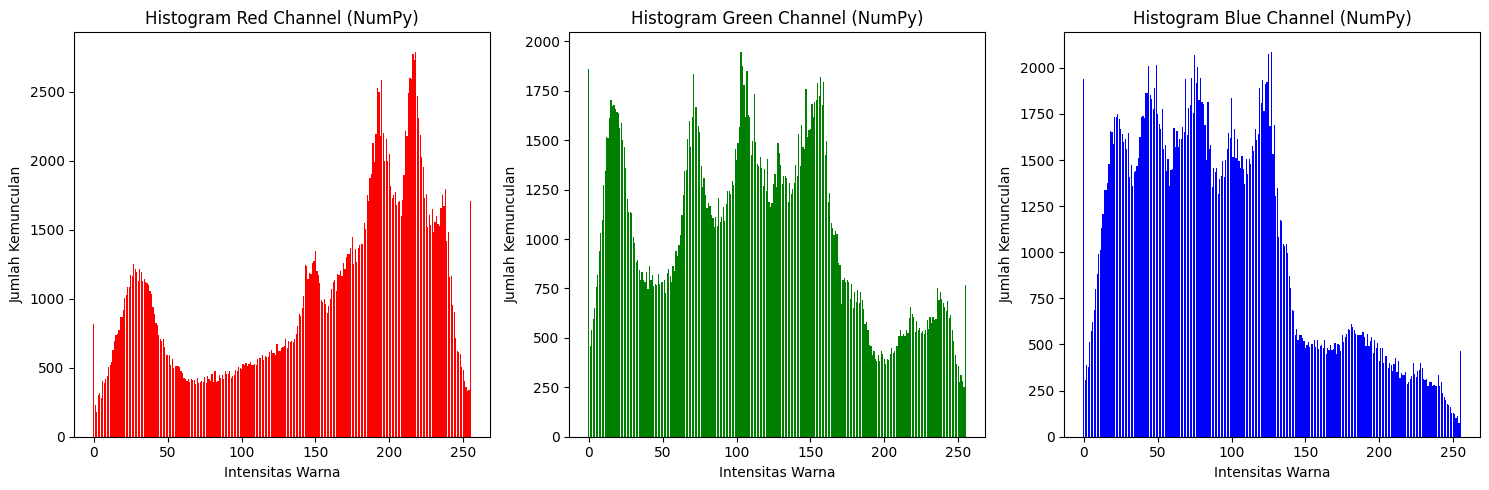

In [9]:
# Input image
image_path = "/content/drive/MyDrive/PCVK/lena.jpg"  # Ganti dengan lokasi gambar Anda
image = cv.imread(image_path)

# Pisahkan kanal warna (R, G, B)
blue_channel = image[:, :, 0]
green_channel = image[:, :, 1]
red_channel = image[:, :, 2]

# Menghitung histogram untuk setiap kanal warna menggunakan NumPy
hist_b, bins_b = np.histogram(blue_channel.flatten(), bins=256, range=[0,256])
hist_g, bins_g = np.histogram(green_channel.flatten(), bins=256, range=[0,256])
hist_r, bins_r = np.histogram(red_channel.flatten(), bins=256, range=[0,256])

# Membuat tiga plot terpisah untuk histogram RGB dengan bar histogram (hasil dari NumPy)
plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.bar(np.arange(256), hist_r, color='red', label='Red Channel')
plt.xlabel('Intensitas Warna')
plt.ylabel('Jumlah Kemunculan')
plt.title('Histogram Red Channel (NumPy)')

plt.subplot(132)
plt.bar(np.arange(256), hist_g, color='green', label='Green Channel')
plt.xlabel('Intensitas Warna')
plt.ylabel('Jumlah Kemunculan')
plt.title('Histogram Green Channel (NumPy)')

plt.subplot(133)
plt.bar(np.arange(256), hist_b, color='blue', label='Blue Channel')
plt.xlabel('Intensitas Warna')
plt.ylabel('Jumlah Kemunculan')
plt.title('Histogram Blue Channel (NumPy)')

plt.tight_layout()
plt.show()

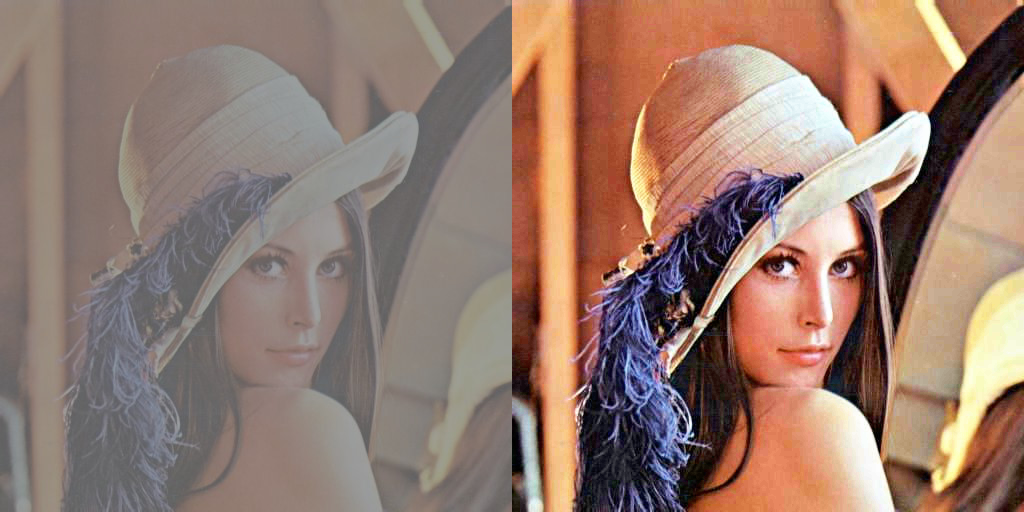

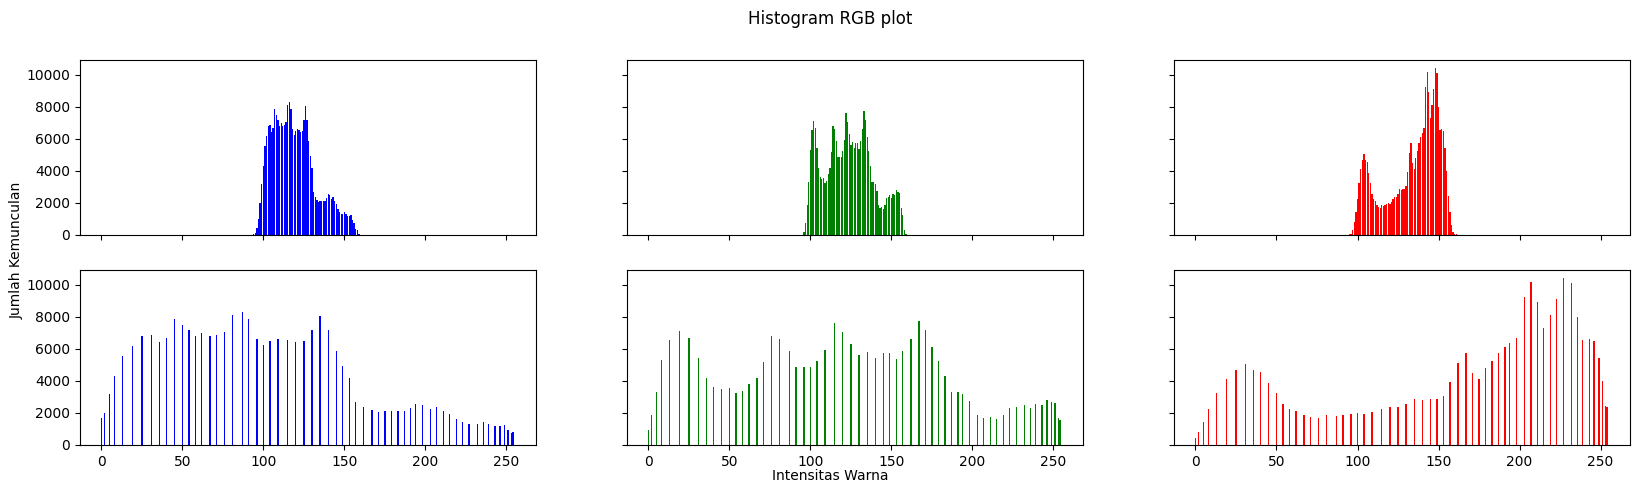

In [46]:
# Baca gambar
img = cv2.imread('/content/drive/MyDrive/PCVK/lena_lc.jpg')

# Fungsi untuk menghitung histogram
def histog(img):
    height, width, depth = img.shape
    hist = np.zeros((3, 256))

    for y in range(height):
        for x in range(width):
            for c in range(depth):
                hist[c][img[y][x][c]] += 1

    return hist

# Hitung histogram asli
histogram_asli = histog(img)

# Konversi gambar ke numpy array
img_array = np.asarray(img)

# Hitung histogram array dengan binning
histogram_array = np.bincount(img_array.flatten(), minlength=256)

# Normalisasi histogram
num_pixels = np.sum(histogram_array)
histogram_array = histogram_array / num_pixels

# Hitung histogram kumulatif normalisasi
cum_histo = np.cumsum(histogram_array)

# Buat lookup table transformasi pixel
transform_map = np.floor(255 * cum_histo).astype(np.uint8)

# Transformasi pixel
img_list = list(img_array.flatten())
eq_img_list = [transform_map[p] for p in img_list]
eq_img_array = np.reshape(np.asarray(eq_img_list), img_array.shape)
img2 = eq_img_array

# Hitung histogram setelah ekualisasi
equal_histo = histog(img2)

# Tampilkan gambar asli dan hasil ekualisasi histogramnya
final_frame = cv2.hconcat((img, img2))
cv2_imshow(final_frame)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Buat label untuk sumbu x histogram
names = np.arange(256)

# Periksa apakah gambar grayscale atau tidak
is_gray_image = np.array_equal(histogram_asli[0], histogram_asli[1]) and np.array_equal(histogram_asli[0], histogram_asli[2])

# Tampilkan histogram
if not is_gray_image:
    fig, axs = plt.subplots(2, 3, figsize=[20, 5], sharex=True, sharey=True)
    fig.suptitle('Histogram RGB plot')
    fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
    fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')

    for i, color in enumerate(['blue', 'green', 'red']):
        axs[0, i].bar(names, histogram_asli[i], color=color)
        axs[1, i].bar(names, equal_histo[i], color=color)
else:
    fig, axs = plt.subplots(1, 2, figsize=[20, 5], sharex=True, sharey=True)
    fig.suptitle('Histogram Grayscale plot')
    fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
    fig.text(0.5, 0.94, 'Intensitas Warna', ha='center')

    axs[0].bar(names, histogram_asli[0], color='gray')
    axs[1].bar(names, equal_histo[0], color='gray')

# Tampilkan histogram
plt.show()

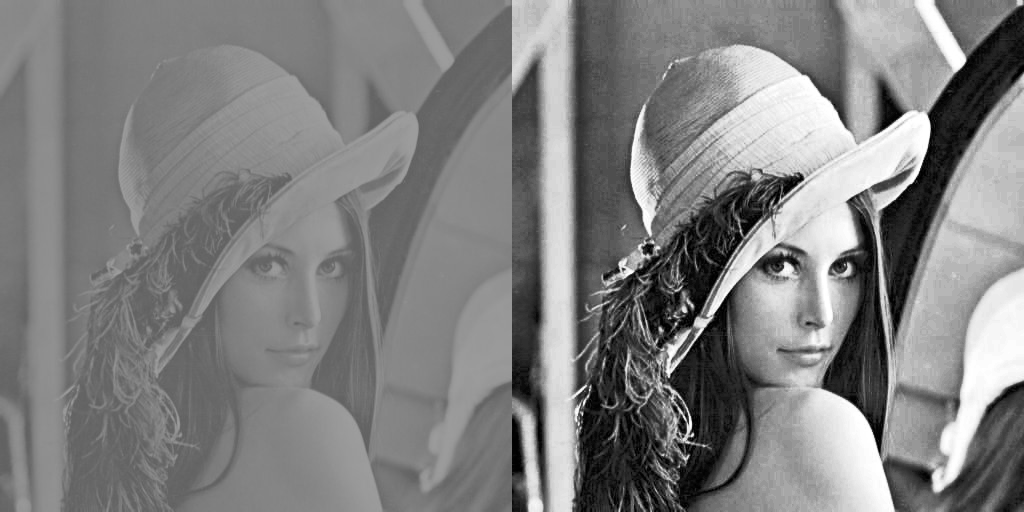

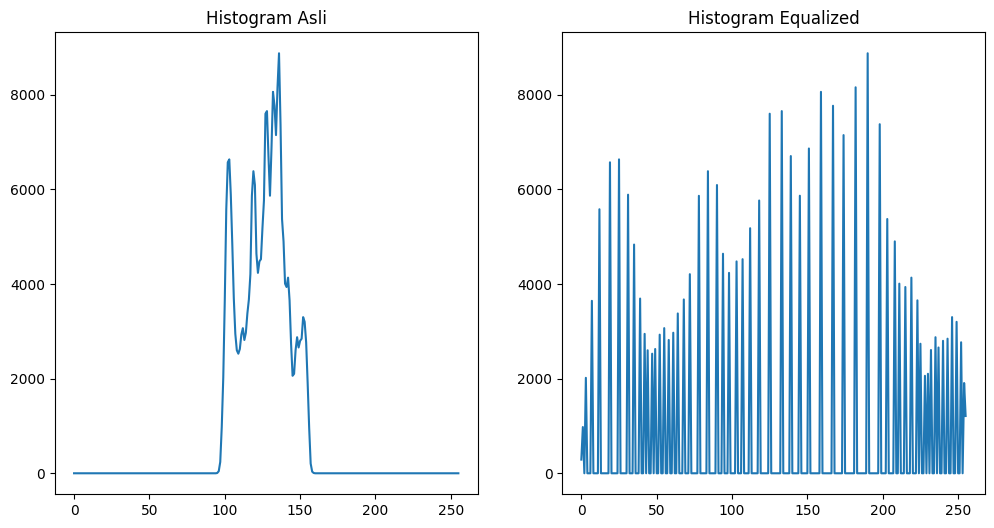

In [49]:
# Baca gambar
img = cv2.imread('/content/drive/MyDrive/PCVK/lena_lc.jpg')

# Konversi citra ke grayscale jika tidak dalam mode grayscale
if len(img.shape) == 3:
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
else:
    img_gray = img

# Terapkan equalizeHist pada citra grayscale
equalized_img = cv2.equalizeHist(img_gray)

# Hitung histogram asli
histogram_asli = cv2.calcHist([img_gray], [0], None, [256], [0, 256])

# Hitung histogram citra yang telah diekualisasi
histogram_equalized = cv2.calcHist([equalized_img], [0], None, [256], [0, 256])

# Tampilkan citra asli dan citra yang telah diekualisasi
final_frame = cv2.hconcat((img_gray, equalized_img))
cv2_imshow(final_frame)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Tampilkan histogram asli dan histogram citra yang telah diekualisasi
plt.figure(figsize=[12, 6])

plt.subplot(121)
plt.plot(histogram_asli)
plt.title('Histogram Asli')

plt.subplot(122)
plt.plot(histogram_equalized)
plt.title('Histogram Equalized')

plt.show()